<h1>UNAD</h1>
<h2>Eduar Yesid González Gómez</h2>
<h2>Predicción de Diabetes con Regresión Logística </h2>

<h1>Pasos de la Actividad</h1>

<div><p>1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</p> </div>
<div><p>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. </p> </div>
<div><p>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. </p> </div>
<div><p>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. </p> </div>
<div><p>5. Entrenar el modelo configurando los diferentes hiperparámetros. </p> </div>
<div><p>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. </p> </div>
<div><p>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</p> </div>
<div><p>8. Interpretar, analizar y documentar los resultados obtenidos. </p> </div>
<div><p>9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/. </p> </div>


<h3> 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h3>

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
rawData = pd.DataFrame(pd.read_csv('./Titanic-Dataset.csv'))

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

rawData.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Descripción de los datos
rawData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

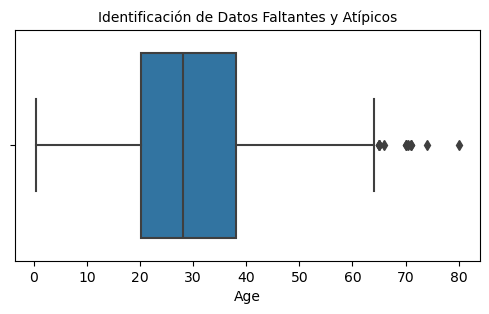

In [5]:
#Identificación de Datos Faltantes y Atípicos - variable Age

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

<h3> 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h3>


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

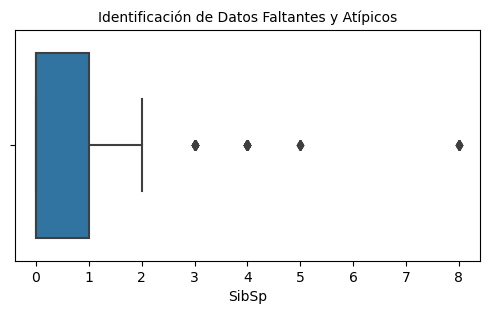

In [6]:
#Revisión de datos faltantes

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

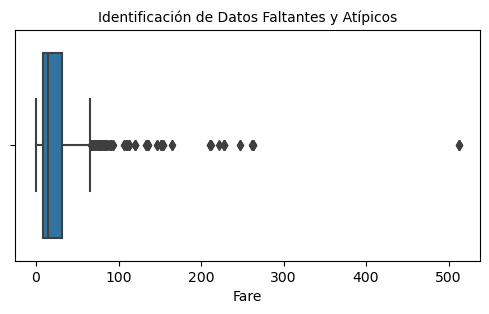

In [7]:
#Identificación de Datos Faltantes y Atípicos - variable Fare

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [8]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Fare: ",rawData['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",rawData['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",rawData['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Fare:  15
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678


In [9]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.
rawData['Age']=rawData['Age'].replace(0,rawData['Age'].mean())
rawData['Fare']=rawData['Fare'].replace(0,rawData['Fare'].mean())
rawData['SibSp']=rawData['SibSp'].replace(0,rawData['SibSp'].mean())
rawData['Parch']=rawData['Parch'].replace(0,rawData['Parch'].mean())

In [10]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Fare: ",rawData['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",rawData['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",rawData['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Fare:  0
Cantidad de Registros con cero en SibSp:  0
Cantidad de Registros con cero en Parch:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

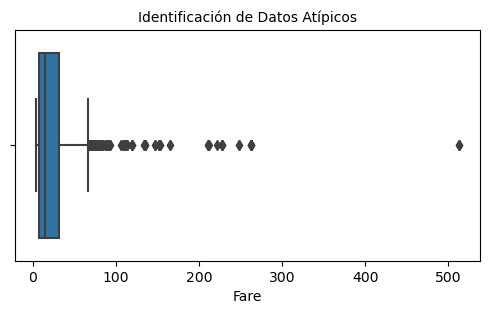

In [11]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=rawData['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [12]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=70
Total_Atipicos=((rawData['Age']<nivel_minimo)|(rawData['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [13]:
# Filtra Datos Atípicos

rawData=rawData[(rawData['Age']<nivel_maximo)&(rawData['Age']>nivel_minimo)]

In [14]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((rawData['Age']<nivel_minimo)|(rawData['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [15]:
#Revisión del tipo de datos y datos faltantes

rawData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  707 non-null    int64  
 1   Survived     707 non-null    int64  
 2   Pclass       707 non-null    int64  
 3   Name         707 non-null    object 
 4   Sex          707 non-null    object 
 5   Age          707 non-null    float64
 6   SibSp        707 non-null    float64
 7   Parch        707 non-null    float64
 8   Ticket       707 non-null    object 
 9   Fare         707 non-null    float64
 10  Cabin        182 non-null    object 
 11  Embarked     705 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 71.8+ KB


<h3> 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características</h3>

In [16]:
# Total de personas que sobrevivieron

rawData['Survived'].value_counts()

Survived
0    418
1    289
Name: count, dtype: int64

<h5>Caracterstica de interes:</h5>

<div>
    <p> Sobrevivió (1 = sobrevivió; 0 = No sobrevivió)</p>
    
</div>


In [17]:
rawData[['Survived']].head(50)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


In [18]:
string_columns=[col for col in rawData.columns if rawData[col].dtype=='object']
print(string_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [19]:
rawData.drop(string_columns,axis=1,inplace=True)

<h3> 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. </h3>

In [21]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = rawData.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = rawData['Survived'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [22]:
print (X_train)

     PassengerId  Pclass   Age     SibSp     Parch     Fare
249          250       2  54.0  1.000000  0.381594  26.0000
569          570       3  32.0  0.523008  0.381594   7.8542
387          388       2  36.0  0.523008  0.381594  13.0000
4              5       3  35.0  0.523008  0.381594   8.0500
610          611       3  39.0  1.000000  5.000000  31.2750
..           ...     ...   ...       ...       ...      ...
771          772       3  48.0  0.523008  0.381594   7.8542
105          106       3  28.0  0.523008  0.381594   7.8958
844          845       3  17.0  0.523008  0.381594   8.6625
685          686       2  25.0  1.000000  2.000000  41.5792
213          214       2  30.0  0.523008  0.381594  13.0000

[530 rows x 6 columns]


In [23]:
print (Y_train)

249    0
569    1
387    1
4      0
610    0
      ..
771    0
105    0
844    0
685    0
213    0
Name: Survived, Length: 530, dtype: int64


<h3> 5. Entrenar el modelo configurando los diferentes hiperparámetros</h3>

In [24]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [25]:
print (Y_test)

719    0
429    1
599    1
681    1
644    1
      ..
418    0
414    1
419    0
515    0
165    1
Name: Survived, Length: 177, dtype: int64


In [26]:
print (Prediccion)

[0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0]


<h3>6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc</h3>

In [27]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       105
           1       0.66      0.49      0.56        72

    accuracy                           0.69       177
   macro avg       0.68      0.66      0.66       177
weighted avg       0.68      0.69      0.68       177



<h3>7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo</h3>

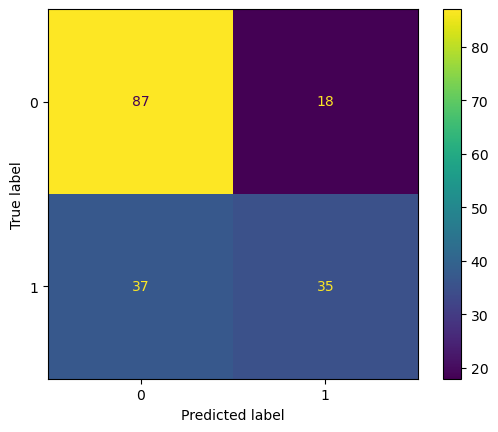

In [28]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

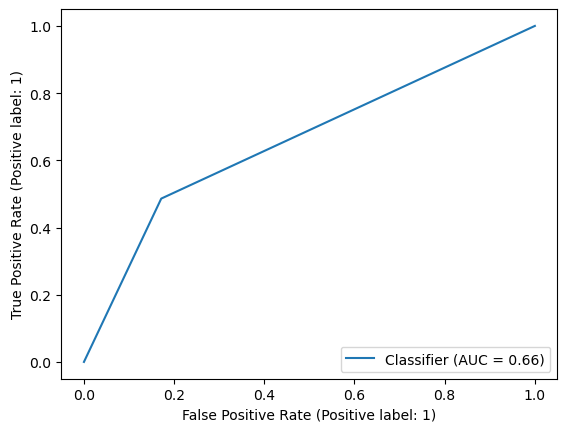

In [29]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()